# Initial plots for node degrees and frequencies

In [1]:
cd ~/thesis

/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Import libraries

In [2]:
import os

import pandas as pd
import networkx as nx

from main_utils import *
from plot_utils import *

/tmp/ipykernel_604/1348101601.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## BlogCatalog

In [3]:
blog_dir = '/home/jovyan/thesis/datasets/blog_catalog/data/'

# blog_dir = 'datasets/blog_catalog/data/'

G = nx.read_edgelist(blog_dir+'edges.csv', delimiter=',')
G.name = 'blog_catalog'

# Groups mapping
group_df = pd.read_csv(blog_dir+'group-edges.csv', delimiter=',')
group_df.columns = ['node', 'group']

walks_filenames = os.listdir('walks')

walks_filename = 'walks_r200_l30_p1_q1_ns_0.75.pkl' # walks_filenames[0]
node_freq_dict, visit_counts, cumulative_freq_prob = freq_gen(walks_filename=walks_filename)

# output_list = [visit_counts, cumulative_freq_prob]
# param_dict = param_dict_gen(params, output_list)

degrees, cumulative_deg_prob = degrees_distribution_gen(G)

In [12]:
def freq_plot(visit_counts, cumulative_freq_prob):
    '''
        Makes a plot of the frequency distribution
    '''
    plt.style.use('default')
    # plt.rcParams['text.usetex'] = True # TeX rendering
    plt.rcParams['font.size'] = 12
    plt.figure(figsize=(6, 5))
    
    # Show grid lines
    plt.grid(color='lightgrey')

    # Set x-axis and y-axis to logarithmic scale
    plt.xscale('log')
    plt.yscale('log')

    # Create a scatter plot
    plt.scatter(x=visit_counts, y=cumulative_freq_prob, s=4, zorder=2, color='royalblue')

    # Set plot title and axis labels with larger font sizes
    plt.xlabel("Visits $x$", fontdict={'size': 16})
    plt.ylabel("$P(V >= x)$", fontdict={'size': 16})

    # # Increase tick label font size and tick line width
    # plt.tick_params(axis='both', which='major', labelsize=14, linewidth=1.2)
    
    # Adjust spacing and save the plot
    plt.tight_layout()
    plt.savefig('figures/freq_plot.svg', dpi=100, bbox_inches='tight')
    plt.savefig('figures/freq_plot.pdf', dpi=100, bbox_inches='tight')
    
    plt.show()

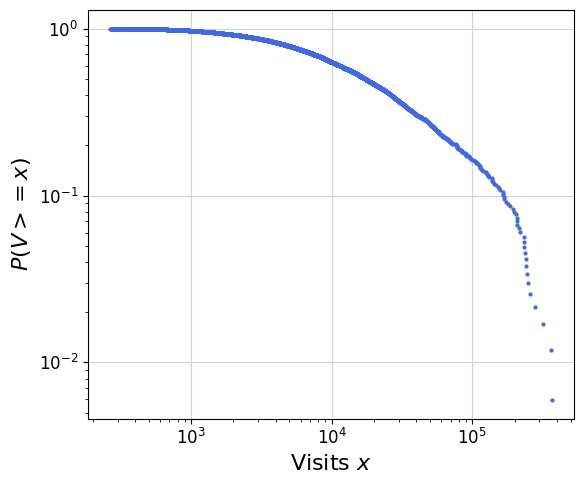

In [13]:
# Plot
fig = freq_plot(visit_counts, cumulative_freq_prob)

In [14]:
def degree_plot(cumulative_deg_prob):
    '''
        Makes a plot of the degree distribution
    '''

    # plt.rcParams['text.usetex'] = True # TeX rendering
    plt.rcParams['font.size'] = 12
    plt.figure(figsize=(6, 5))
    
    # Show dashed grid lines
    plt.grid(color='lightgrey')
    # Set x-axis and y-axis to logarithmic scale
    plt.xscale('log')
    plt.yscale('log')

    # Create a scatter plot
    plt.scatter(list(range(len(cumulative_deg_prob))), cumulative_deg_prob, s=4, zorder=2, color='royalblue')

    # Set plot title and axis labels
    # plt.title("$\log$-$\log$ plot of degree distribution")
    plt.xlabel("Degree", fontdict={'size': 16})
    plt.ylabel("$P(deg(v)\geq x)$", fontdict={'size': 16})

    # # Save and display the plot
    plt.tight_layout()
    plt.savefig('figures/degree_plot.svg', dpi=100, bbox_inches='tight')
    plt.savefig('figures/degree_plot.pdf', dpi=100, bbox_inches='tight')

    plt.show()

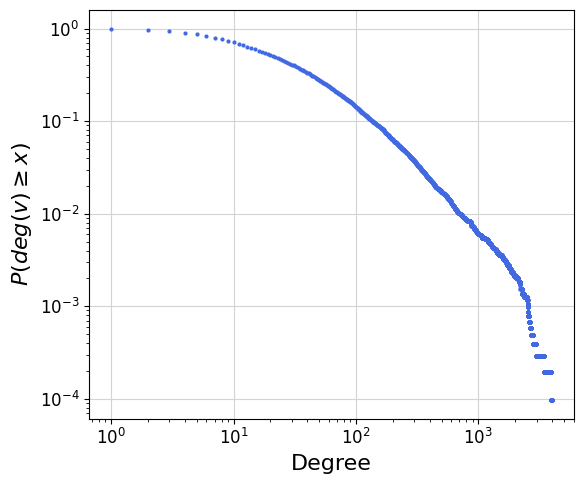

In [15]:
# Plot
fig = degree_plot(cumulative_deg_prob)

In [17]:
def degree_freq_plot(graph, degrees, node_freq_dict):
    '''
        Makes a scatter plot of the degrees and the node frequencies
    '''

    # Edit the font, font size, and axes width
    # mpl.rcParams['font.family'] = 'Arial'
    # plt.rcParams['axes.linewidth'] = 2

    # plt.rcParams['text.usetex'] = True # TeX rendering
    plt.rcParams['font.size'] = 12 
    plt.figure(figsize=(6, 5))

    # Show dashed grid lines
    plt.grid(color='lightgrey')
    # Create a scatter plot
    plt.scatter(sorted(degrees), sorted(node_freq_dict.values()), s=4, zorder=2, color='royalblue')

    # Set plot title and axis labels
    # plt.title(r"Degree vs Frequency Plot for {} $|V|={}$, $|E|={}$".format(graph.name, graph.number_of_nodes(), graph.number_of_edges()))
    plt.xlabel("Degree", fontdict={'size': 16})
    plt.ylabel("Visits", fontdict={'size': 16})

    # Save and display the plot
    plt.tight_layout()
    plt.savefig('figures/degree_freq_plot.svg', dpi=100, bbox_inches='tight')
    plt.savefig('figures/degree_freq_plot.pdf', dpi=100, bbox_inches='tight')

    plt.show()


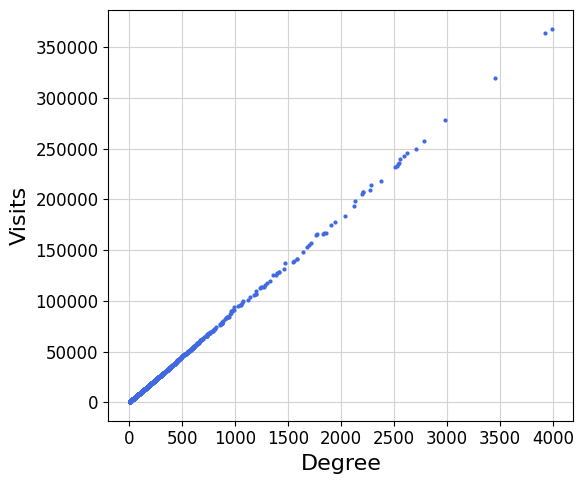

In [18]:
# Plot
fig = degree_freq_plot(G, degrees, node_freq_dict)

In [11]:
# plt.rcParams.values()

## Stochastic Block Model

In [3]:
sizes = [10, 10, 25]
probs = [[0.25, 0.05, 0.02], [0.05, 0.35, 0.07], [0.02, 0.07, 0.40]]

G = nx.stochastic_block_model(sizes, probs, seed=0)

params = [64, 10, 80, 0.25, 4]

node2vec, model = model_gen(G, params)

walks = node2vec.walks

node_freq_dict, visit_counts, cumulative_freq_prob = freq_gen(walks=walks)

# output_list = [visit_counts, cumulative_freq_prob]
# param_dict = param_dict_gen(params, output_list)

degrees, cumulative_deg_prob = degrees_distribution_gen(G)

Computing transition probabilities...
Random walks in progress...


  0%|          | 0/8 [00:00<?, ?it/s]

Fitting model...
Model generated - (|V| = 45 , |E| = 165)


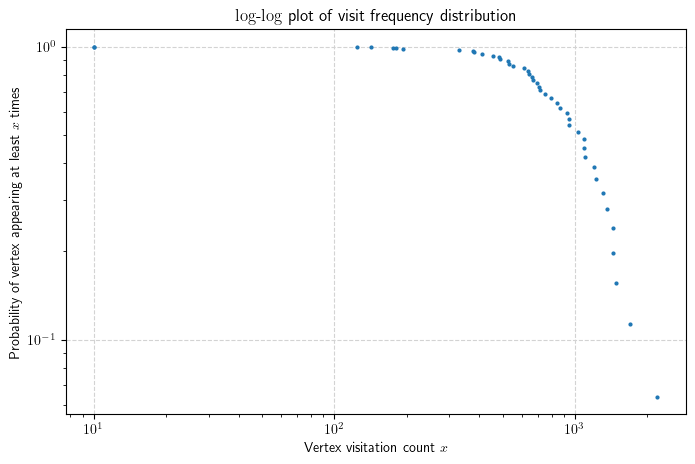

In [4]:
# Plot
fig = freq_plot(visit_counts, cumulative_freq_prob)

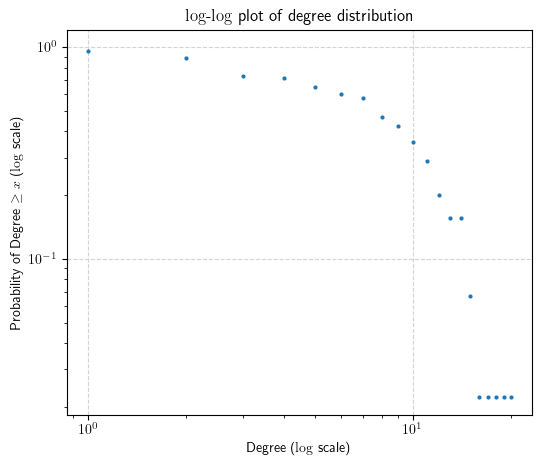

In [5]:
# Plot
fig = degree_plot(cumulative_deg_prob)

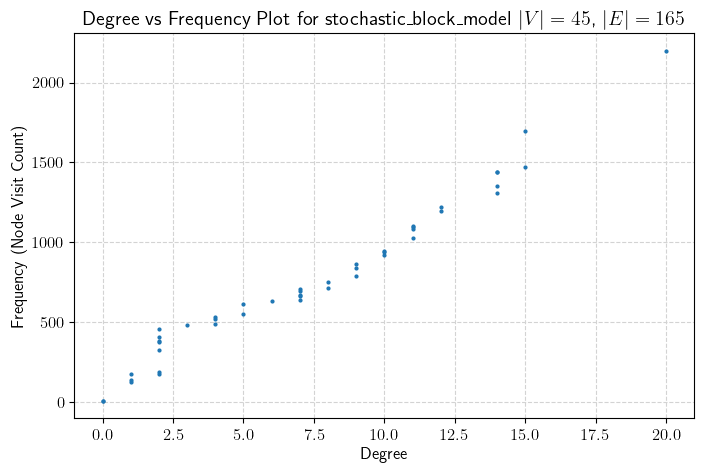

In [6]:
# Plot
fig = degree_freq_plot(G, degrees, node_freq_dict)

# data = {'Degrees': sorted(degrees), 'Frequencies': sorted(node_freq_dict.values())}
# deg_freq_df = pd.DataFrame(data)

# # Calculate correlation
# correlation = deg_freq_df['Degrees'].corr(deg_freq_df['Frequencies'])

# print(correlation)

## Grid Search through $p, q$ and other parameters

In [7]:
def params_grid_search(graph, params_list):
    '''
        Performs grid search and outputs plots using Matplotlib
    '''

    # Initialize figures
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()

    for params in tqdm(params_list):

        [d, r, l, p, q] = params

        # Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
        node2vec = Node2Vec(graph, dimensions=d, walk_length=l, num_walks=r, p=p, q=q, workers=8, quiet=True)  # Use temp_folder for big graphs
        walks = node2vec.walks
        
        # Degrees and walks' frequencies
        degrees, cumulative_deg_prob = degrees_distribution_gen(graph)
        node_freq_dict, visit_counts, cumulative_freq_prob = freq_gen(walks=walks)

        # Plotting the visit frequency distribution
        ax1.scatter(visit_counts, cumulative_freq_prob, label=f'p={p}, q={q}', s=25, marker='x')
        
        # Plotting the degree vs frequency
        ax2.scatter(sorted(degrees), sorted(node_freq_dict.values()), label=f'p={p}, q={q}', s=25)

    # Configure the first plot (visit frequency distribution)
    # ax1.set_title(f"Log-log plot of visit frequency distribution for {graph.name} |V|={graph.number_of_nodes()}, |E|={graph.number_of_edges()}")
    ax1.set_xlabel("Visits $x$", fontdict={'size': 16})
    ax1.set_ylabel("$P(V >= x)$", fontdict={'size': 16})
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend()
    ax1.grid(True, which='both', linestyle='--', linewidth=0.25)

    # Configure the second plot (degree vs frequency)
    # ax2.set_title(f"Degree vs Frequency Plot for {graph.name} |V|={graph.number_of_nodes()}, |E|={graph.number_of_edges()}")
    ax2.set_xlabel("Degree", fontdict={'size': 16})
    ax2.set_ylabel("Visits", fontdict={'size': 16})
    ax2.legend()
    ax2.grid(True, which='both', linestyle='--', linewidth=0.25)

    # Adjust figure sizes
    fig1.set_size_inches(6, 5)
    fig2.set_size_inches(6, 5)

    # Show the plots
    plt.show()

    # Optionally save the figures
    fig1.savefig('figures/visit_frequency_distribution.pdf', dpi=150, bbox_inches='tight')
    fig2.savefig('figures/degree_vs_frequency.pdf', dpi=150, bbox_inches='tight')


  0%|          | 0/5 [00:00<?, ?it/s]

Computing transition probabilities...
Random walks in progress...


  0%|          | 0/8 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:00,  7.00it/s]

Computing transition probabilities...
Random walks in progress...


  0%|          | 0/8 [00:00<?, ?it/s]

 40%|████      | 2/5 [00:00<00:00,  6.71it/s]

Computing transition probabilities...
Random walks in progress...


  0%|          | 0/8 [00:00<?, ?it/s]

 60%|██████    | 3/5 [00:00<00:00,  5.96it/s]

Computing transition probabilities...
Random walks in progress...


  0%|          | 0/8 [00:00<?, ?it/s]

 80%|████████  | 4/5 [00:00<00:00,  5.92it/s]

Computing transition probabilities...
Random walks in progress...


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00,  6.07it/s]


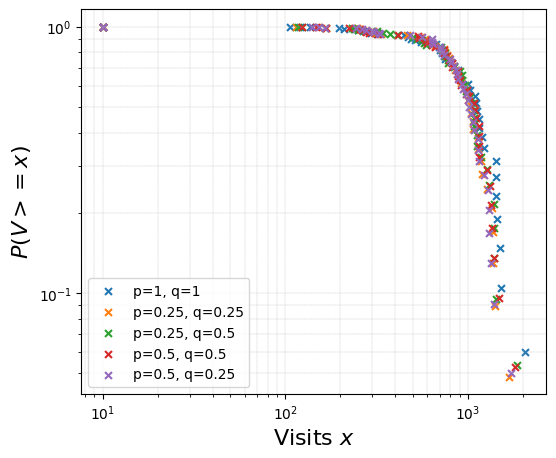

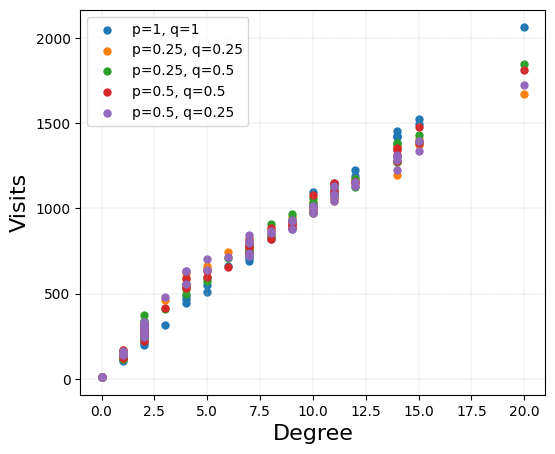

In [8]:
params_list = [[64, 10, 80, 1, 1],
              [64, 10, 80, 0.25, 0.25],
              [64, 10, 80, 0.25, 0.5],
              [64, 10, 80, 0.5, 0.5],
              [64, 10, 80, 0.5, 0.25]
            ]

# Plot
params_grid_search(G, params_list)

In [18]:
params_list = [[64, 10, 80, 1, 1],
              [64, 10, 80, 0.25, 0.25],
              [64, 10, 80, 0.25, 0.5],
              [64, 10, 80, 0.5, 0.5],
              [64, 10, 80, 0.5, 0.25]
            ]

# Plot
params_grid_search(G, params_list)

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
